<a id="section1"></a>
## 1. Import des données et contrôles initiaux

Avant de commencer toute analyse ou de construire des modèles de machine learning, il est indispensable de vérifier que les données sont correctement chargées et exploitables.

Dans cette première étape, l’objectif est simplement de :
- charger le fichier de données fourni par l’ONCFM ;
- vérifier la structure du jeu de données (nombre de lignes, colonnes, types) ;
- identifier la présence éventuelle de valeurs manquantes ;
- vérifier la distribution de la variable cible (`is_genuine`).

Cette étape ne consiste pas encore à analyser les relations entre les variables, mais uniquement à s’assurer que la “matière première” est saine et conforme au cahier des charges.

In [2]:
# ================================
# Section 1 - Import des données
# ================================

import pandas as pd
import numpy as np

# Pour un affichage plus lisible
pd.set_option("display.max_columns", None)

# Chargement du fichier de données
df = pd.read_csv("billets.csv", sep=";")

# Affichage des 5 premières lignes
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [3]:
# ================================
# Structure du jeu de données
# ================================

df.info()

# ================================
# Vérification des valeurs manquantes
# ================================

df.isna().sum()

# ================================
# Répartition de la variable cible
# ================================

df["is_genuine"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


is_genuine
True     1000
False     500
Name: count, dtype: int64

### Interprétation – Section 1 : Import et contrôles initiaux

Le jeu de données contient **1500 observations** et **7 variables**, ce qui correspond bien au cahier des charges fourni par l’ONCFM.

Les types de données sont cohérents :
- la variable cible `is_genuine` est de type booléen ;
- les autres variables sont numériques (`float64`), ce qui est adapté pour les analyses statistiques et les algorithmes de machine learning.

Une seule variable présente des valeurs manquantes :
- `margin_low` contient **1463 valeurs non nulles**, soit **37 valeurs manquantes**.

Cela confirme l’information fournie en amont : une étape d’imputation sera nécessaire ultérieurement.

La répartition de la variable cible est conforme aux attentes :
- **1000 vrais billets** (`True`)
- **500 faux billets** (`False`)

Le jeu de données est donc **complet, cohérent et exploitable**, sous réserve de traiter la variable `margin_low` manquante dans une étape ultérieure.

<a id="section2"></a>
## 2. Analyse exploratoire des données (EDA)

Avant de construire des modèles statistiques ou de machine learning, il est indispensable de comprendre la structure du jeu de données à l’aide d’une analyse exploratoire.

L’objectif de cette section est de :
- visualiser les relations entre les différentes variables ;
- identifier d’éventuelles corrélations fortes entre prédicteurs ;
- repérer la présence de valeurs atypiques ;
- observer les différences potentielles entre vrais et faux billets.

Pour cela, nous utiliserons principalement :
- un **pairplot** pour avoir une vision globale des relations entre variables ;
- une **matrice de corrélation** pour quantifier ces relations ;
- des **boxplots** pour comparer les distributions entre vrais et faux billets.

Cette étape permet de mieux orienter la suite de l’analyse et les choix de modélisation.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

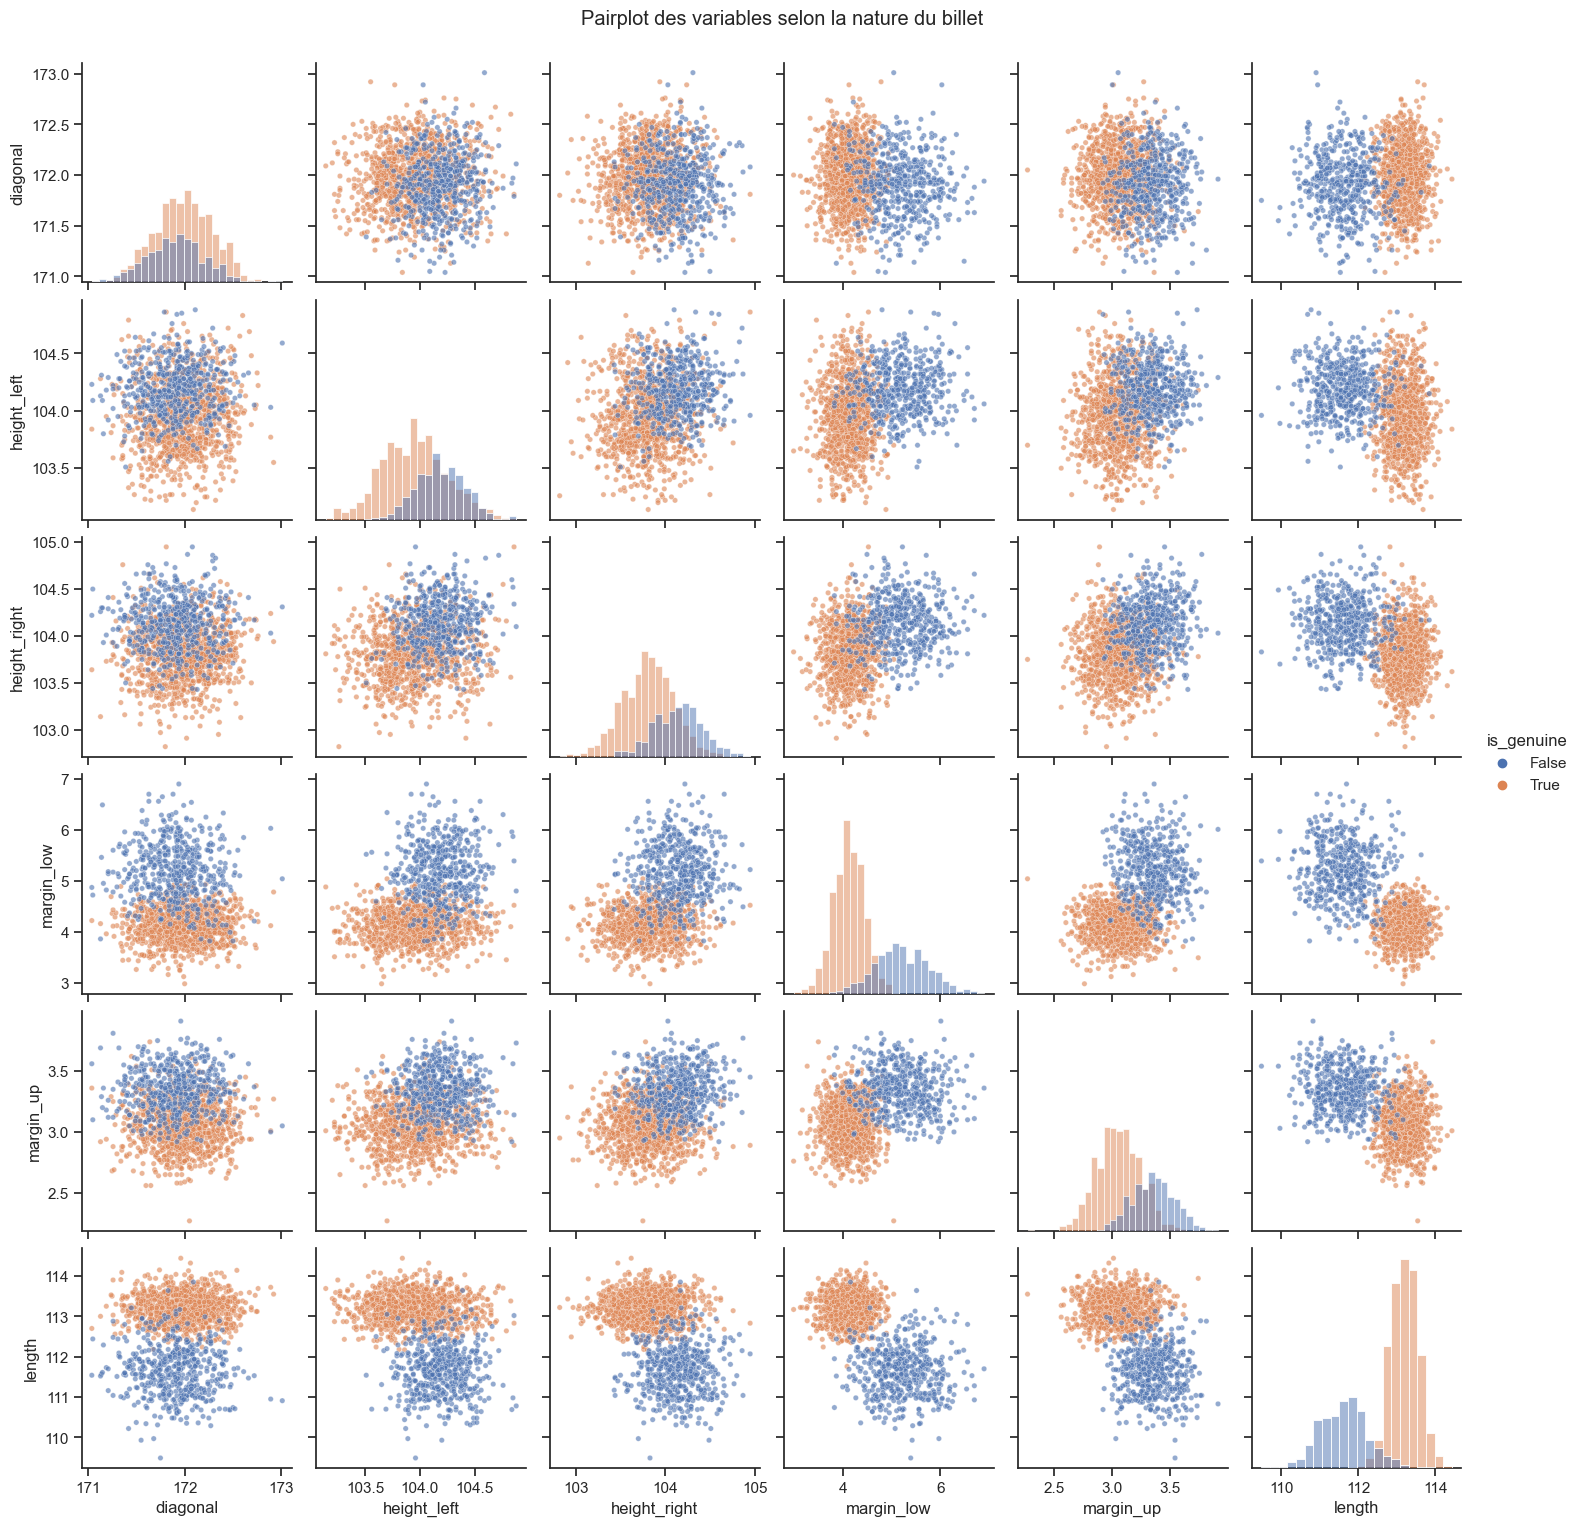

In [6]:
# ================================
# Section 2.1 - Pairplot
# ================================

import seaborn as sns
import matplotlib.pyplot as plt

# Pour éviter les problèmes d'affichage avec beaucoup de points
sns.set(style="ticks")

sns.pairplot(
    df,
    hue="is_genuine",
    diag_kind="hist",
    plot_kws={"alpha": 0.6, "s": 15}
)

plt.suptitle("Pairplot des variables selon la nature du billet", y=1.02)
plt.show()

### Interprétation du pairplot

Le pairplot permet d’observer simultanément les distributions de chaque variable ainsi que les relations deux à deux entre les différentes mesures, en distinguant les vrais et les faux billets.


#### Conclusion intermédiaire

Le pairplot montre que :
- les variables sont bien structurées,
- certaines possèdent un pouvoir discriminant naturel,
- les relations entre variables ne sont ni totalement aléatoires ni totalement redondantes.
- L’analyse exploratoire met en évidence que margin_low, margin_up et length sont fortement discriminantes entre billets authentiques et contrefaits. Cette information sera exploitée dans la partie classification, tandis que pour l’imputation de margin_low, l’ensemble des variables explicatives est conservé afin de maximiser la précision de la prédiction.

Cette première exploration visuelle justifie la poursuite de l’analyse via une **matrice de corrélation chiffrée**, afin de quantifier plus précisément ces relations.

### 2.2 Matrice de corrélation

Après l’exploration visuelle réalisée avec le pairplot, nous utilisons une matrice de corrélation afin de quantifier précisément les relations linéaires entre les différentes variables.

La matrice de corrélation permet :
- d’identifier les variables fortement corrélées entre elles ;
- de détecter une éventuelle redondance entre prédicteurs ;
- d’orienter les choix futurs de modélisation (régression, classification).

In [9]:
# ================================
# Section 2.2 - Matrice de corrélation
# ================================

# On conserve uniquement les lignes où margin_low est connu
df_complete = df.dropna(subset=["margin_low"])

# Calcul de la matrice de corrélation
corr_matrix = df_complete.drop(columns=["is_genuine"]).corr()

corr_matrix

,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,1.000000,0.018265,-0.019428,-0.111534,-0.059147,0.100758
height_left,0.018265,1.000000,0.235132,0.302643,0.243812,-0.314344
height_right,-0.019428,0.235132,1.000000,0.391085,0.306867,-0.404272
margin_low,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.059147,0.243812,0.306867,0.431606,1.000000,-0.521139
length,0.100758,-0.314344,-0.404272,-0.666753,-0.521139,1.000000


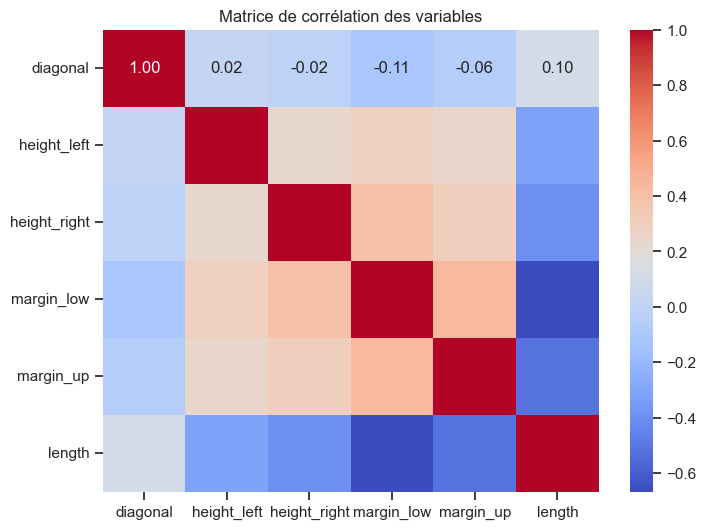

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation des variables")
plt.show()

### Interprétation de la matrice de corrélation

La matrice de corrélation permet de quantifier les relations linéaires entre les différentes variables du jeu de données.

#### 1. Corrélations impliquant `margin_low`

La variable `margin_low` présente :
- une **corrélation positive modérée** avec :
  - `margin_up` (**+0.43**),
  - `height_right` (**+0.39**),
  - `height_left` (**+0.30**) ;
- une **corrélation négative forte** avec :
  - `length` (**–0.67**) ;
- une corrélation très faible avec :
  - `diagonal` (**–0.11**).

Cela signifie que :
- plus la **longueur du billet augmente**, plus la **marge basse diminue** ;
- les **marges haute et basse évoluent dans le même sens**, ce qui est cohérent géométriquement.

#### 2. Corrélations entre les prédicteurs

Les corrélations entre variables explicatives restent **modérées à faibles** :
- `height_left` et `height_right` : **+0.24** (corrélation modérée),
- `height_right` et `length` : **–0.40**,
- `margin_up` et `length` : **–0.52**.

Aucune corrélation très proche de 1 ou –1 n’est observée entre les prédicteurs, ce qui indique :
- une **absence de redondance forte** entre les variables ;
- un risque a priori **limité de colinéarité sévère** à ce stade.

#### 3. Lecture globale

La matrice de corrélation confirme ce qui avait été observé visuellement dans le pairplot :
- `margin_low`, `margin_up` et `length` sont fortement liées entre elles ;
- les autres relations sont plus modérées ;
- aucune variable n’est totalement indépendante ni totalement redondante.

#### Conclusion intermédiaire

La structure des corrélations est cohérente avec la géométrie d’un billet.  
Les variables explicatives ne présentent pas de redondance extrême, ce qui est favorable :
- à l’interprétation statistique,
- et à l’utilisation future dans les modèles de régression et de classification.

L’analyse peut donc se poursuivre avec la **comparaison des distributions via des boxplots**.

### 2.3 Comparaison des distributions par boxplots

Afin de comparer directement les distributions des variables entre les **vrais billets** et les **faux billets**, nous utilisons des boxplots.

Les boxplots permettent :
- de comparer les médianes entre les deux classes ;
- d’observer la dispersion des valeurs ;
- de repérer d’éventuelles valeurs extrêmes ;
- d’identifier les variables présentant un fort pouvoir discriminant entre vrais et faux billets.

Chaque variable est comparée séparément en fonction de la variable cible `is_genuine`.

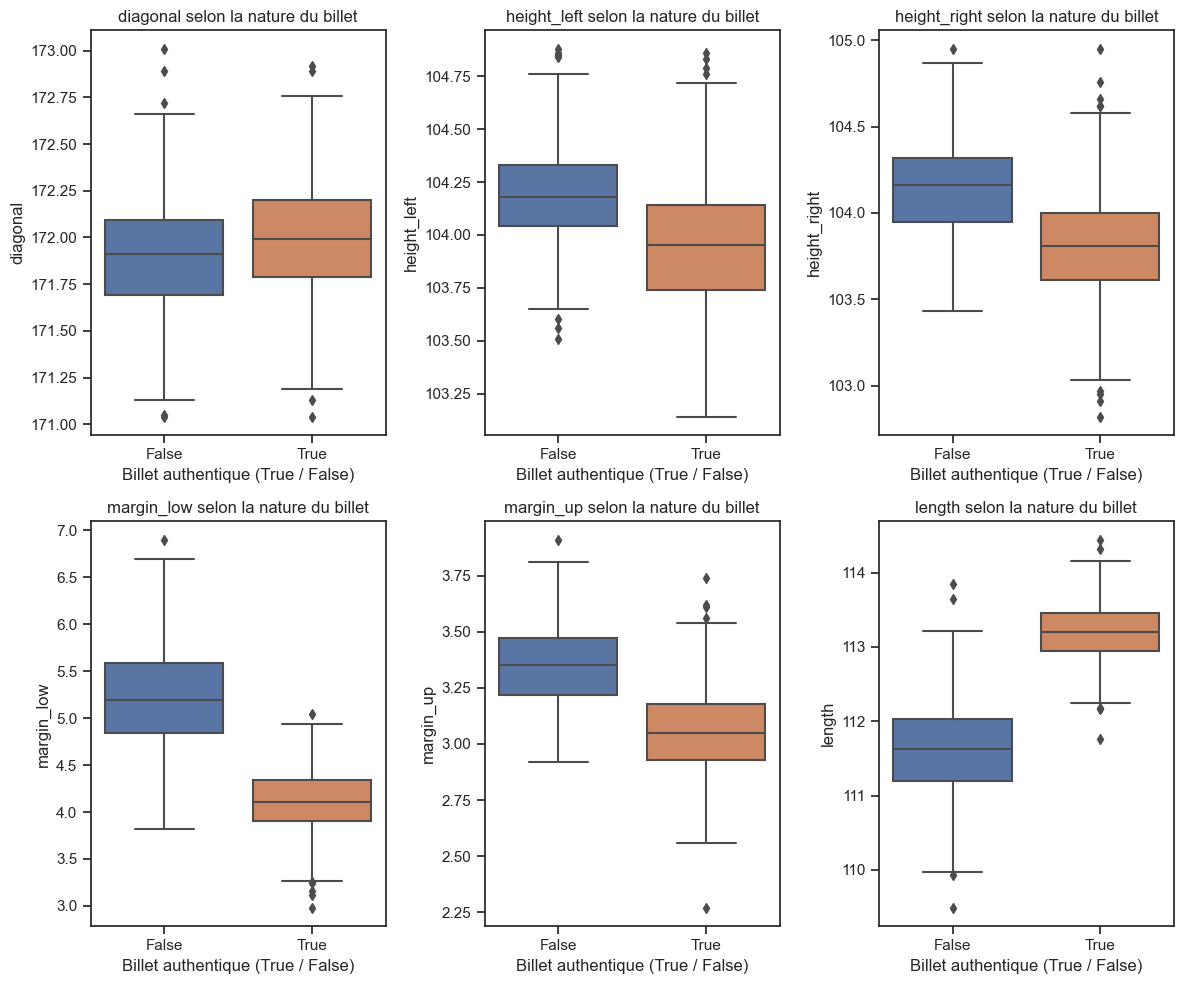

In [13]:
# ================================
# Section 2.3 - Boxplots (vrai vs faux)
# ================================

variables = ["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]

plt.figure(figsize=(12, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x="is_genuine", y=var, data=df)
    plt.title(f"{var} selon la nature du billet")
    plt.xlabel("Billet authentique (True / False)")

plt.tight_layout()
plt.show()

### Interprétation des boxplots

Les boxplots permettent de comparer la distribution de chaque variable entre les **vrais billets** et les **faux billets**.

#### 1. `diagonal`
On observe un **léger décalage de médiane** entre les vrais et les faux billets, mais avec un **fort chevauchement des distributions**.  
Cette variable seule ne semble pas fortement discriminante.

#### 2. `height_left` et `height_right`
Pour ces deux variables, les **médianes sont plus élevées pour les faux billets** que pour les vrais billets.  
Les distributions sont toutefois encore **partiellement chevauchantes**, ce qui indique un pouvoir discriminant **modéré**.

#### 3. `margin_low`
La différence est ici **très marquée** :
- les faux billets présentent une **marge basse plus élevée** ;
- les vrais billets ont des valeurs beaucoup plus faibles.
Le chevauchement entre les deux groupes est limité.  
`margin_low` apparaît comme une **variable très discriminante**.

#### 4. `margin_up`
On observe également un **décalage net entre les deux classes** :
- les faux billets ont des valeurs plus élevées que les vrais billets.
Cette variable possède elle aussi un **bon pouvoir discriminant**.

#### 5. `length`
Les vrais billets sont en moyenne **plus longs** que les faux billets.
La séparation entre les deux groupes est assez visible, avec un chevauchement limité.  
`length` constitue également une **variable informative pour la classification**.

### Conclusion intermédiaire de l’analyse par boxplots

Les boxplots confirment que certaines variables permettent déjà de bien différencier les vrais et les faux billets, en particulier :
- `margin_low`,
- `margin_up`,
- `length`.

Les autres variables (`diagonal`, `height_left`, `height_right`) présentent un pouvoir discriminant plus faible mais restent néanmoins exploitables lorsqu’elles sont combinées dans un modèle de classification.

Cette analyse confirme que le jeu de données contient une **structure exploitable pour la détection des faux billets**.

<a id="section3"></a>
## 3. Régression linéaire multiple (analyse statistique de `margin_low`)

À l’issue de l’analyse exploratoire, nous avons identifié que certaines variables, notamment `length` et `margin_low`, présentent des différences marquées entre les vrais et les faux billets, ainsi que des corrélations importantes.

Avant de procéder à l’imputation des valeurs manquantes de `margin_low`, nous souhaitons mener une **analyse statistique approfondie** à l’aide d’une **régression linéaire multiple (OLS – Ordinary Least Squares)**.

### Objectifs de cette section

L’objectif de cette régression est de :
- modéliser statistiquement la variable `margin_low` en fonction des autres mesures du billet ;
- identifier, à l’aide des **p-values**, quelles variables ont un **effet significatif** sur `margin_low` ;
- éliminer les variables non significatives (au seuil α = 0,05) ;
- construire un modèle statistique plus parcimonieux et interprétable ;
- préparer les bases d’un modèle robuste pour l’imputation des valeurs manquantes.

Cette étape relève d’une **démarche explicative** (et non prédictive) : il s’agit de comprendre les relations statistiques entre les variables avant toute utilisation pour la complétion des données.

### 3.1 Modèle OLS initial avec l’ensemble des variables

Un premier modèle de régression linéaire multiple est estimé avec toutes les variables explicatives afin d’identifier, via les **p-values**, celles ayant un effet significatif sur `margin_low`.

In [17]:
# ================================
# Section 3.1 - Modèle OLS complet
# ================================

import statsmodels.api as sm

# Jeu de données sans valeurs manquantes sur margin_low
billet_sans_nan = df[df["margin_low"].notna()].copy()

billet_sans_nan.shape

import statsmodels.api as sm

X = billet_sans_nan[[
    "is_genuine",
    "diagonal",
    "height_left",
    "height_right",
    "margin_up",
    "length"
]].copy()

# Encodage de la variable booléenne
X["is_genuine"] = X["is_genuine"].astype(int)

# Ajout de la constante
X = sm.add_constant(X)

y = billet_sans_nan["margin_low"]

model_ols_full = sm.OLS(y, X).fit()
print(model_ols_full.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Wed, 31 Dec 2025   Prob (F-statistic):          4.75e-299
Time:                        11:39:52   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.8668      8.316      0.345   

### Interprétation du modèle OLS complet

Le modèle de régression linéaire multiple est estimé sur 1463 observations, avec l’ensemble des variables explicatives, y compris *is_genuine*.

Le modèle est globalement **très significatif** (p-value du test F ≈ 4,75e-299) et présente un **R² de 0,617**, ce qui indique qu’environ 62 % de la variabilité de *margin_low* est expliquée par les variables du modèle.

L’analyse des p-values montre que seules deux variables sont **statistiquement significatives** (p < 0,05) :
- *is_genuine* (p = 0.000)
- *margin_up* (p = 0.000)

Les autres variables (*diagonal*, *height_left*, *height_right*, *length*) ne sont pas significatives et n’apportent pas d’information explicative supplémentaire dans ce modèle.

Conformément à la démarche de sélection des variables, le modèle est donc simplifié en ne conservant que les variables significatives *is_genuine* et *margin_up* pour la suite des analyses.

In [19]:
X_reduced = billet_sans_nan[["is_genuine", "margin_up"]].copy()
X_reduced["is_genuine"] = X_reduced["is_genuine"].astype(int)
X_reduced = sm.add_constant(X_reduced)

y = billet_sans_nan["margin_low"]

model_ols_final = sm.OLS(y, X_reduced).fit()
print(model_ols_final.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Wed, 31 Dec 2025   Prob (F-statistic):          1.24e-304
Time:                        11:39:52   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9263      0.198     30.003      0.0

### Interprétation du modèle OLS final

Le modèle de régression linéaire final est estimé à partir de 1463 observations en ne conservant que les deux variables significatives : *is_genuine* et *margin_up*.

Le modèle est **hautement significatif** (p-value du test F ≈ 1,24e-304) et présente un **R² de 0,617**, très proche de celui du modèle complet. Cela montre que la suppression des variables non significatives n’a **pas dégradé la capacité explicative du modèle**.

Les deux variables conservées sont toutes deux **fortement significatives** (p < 0,001) :
- *is_genuine* a un coefficient négatif indiquant que les billets authentiques présentent en moyenne une valeur de *margin_low* plus faible que les faux billets.
- *margin_up* a également un effet négatif, traduisant une relation inverse entre la marge haute et la marge basse.

Ce modèle, plus **parcimonieux** et statistiquement robuste, est retenu pour la suite des analyses et pour l’imputation des valeurs manquantes de *margin_low*.

### 3.2 Analyse des résidus studentisés

Les résidus studentisés permettent d’identifier les observations pour lesquelles l’erreur de prédiction est anormalement élevée. Ils sont utilisés pour détecter d’éventuelles valeurs atypiques sur la variable `margin_low`.

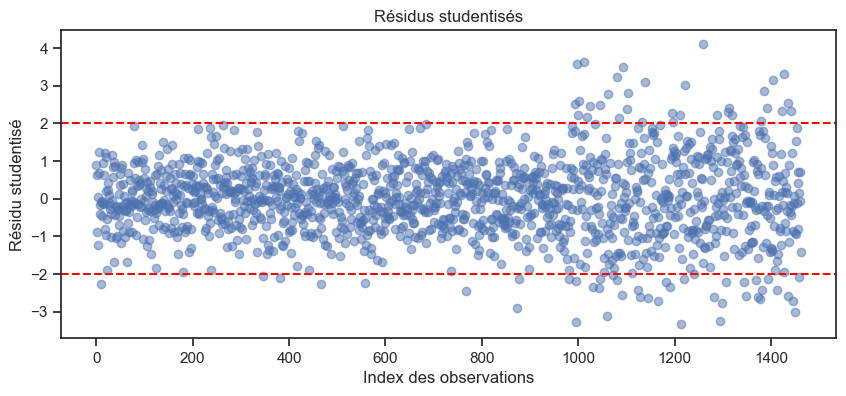

75

In [22]:
# ================================
# Section 3.2 - Résidus studentisés
# ================================

# Résidus studentisés
influence = model_ols_final.get_influence()
studentized_residuals = influence.resid_studentized_internal

# Visualisation
plt.figure(figsize=(10, 4))
plt.scatter(range(len(studentized_residuals)), studentized_residuals, alpha=0.5)
plt.axhline(y=2, color='red', linestyle='--')
plt.axhline(y=-2, color='red', linestyle='--')
plt.title("Résidus studentisés")
plt.xlabel("Index des observations")
plt.ylabel("Résidu studentisé")
plt.show()

# Nombre de résidus au-delà du seuil
outliers_resid = np.where((studentized_residuals > 2) | (studentized_residuals < -2))[0]
len(outliers_resid)

### Interprétation des résidus studentisés

La plupart des résidus studentisés se situent entre -2 et +2, ce qui indique que les erreurs de prédiction du modèle restent globalement dans une zone « normale ».

Quelques points dépassent ces seuils, ce qui traduit la présence de quelques observations atypiques, mais en nombre limité au regard des 1463 billets. 

Aucun schéma particulier ne se dégage dans la répartition des résidus, ce qui suggère que le modèle ne présente pas d’anomalie majeure liée à des erreurs extrêmes.

### 3.3 Analyse des leviers et de la distance de Cook

Les leviers permettent d’identifier les observations présentant des valeurs atypiques sur les variables explicatives.  
La distance de Cook mesure l’influence globale de chaque observation sur les coefficients de la régression.

Ces indicateurs sont utilisés pour vérifier qu’aucune observation n’exerce une influence excessive sur le modèle.

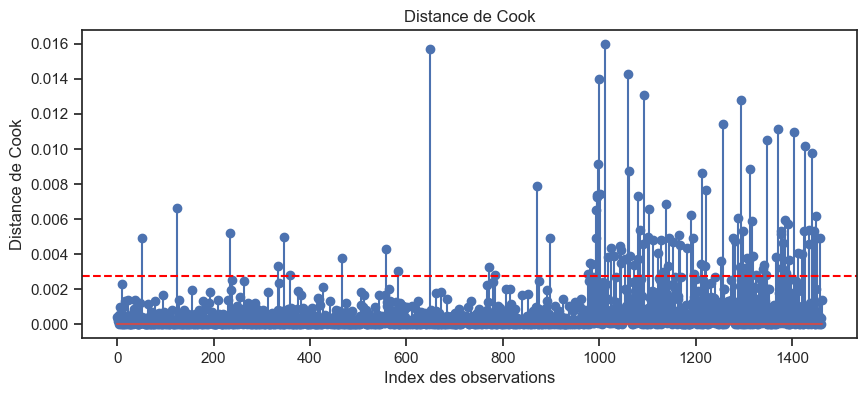

102

In [25]:
# ================================
# Section 3.3 - Leviers et distance de Cook
# ================================

# Leviers (hat values)
leverage = influence.hat_matrix_diag

# Distance de Cook
cooks_d = influence.cooks_distance[0]

# Seuils usuels
n = X.shape[0]
leverage_threshold = 2 * (X.shape[1]) / n
cooks_threshold = 4 / n

# Visualisation Distance de Cook
plt.figure(figsize=(10, 4))
plt.stem(cooks_d) 
plt.axhline(y=cooks_threshold, color='red', linestyle='--')
plt.title("Distance de Cook")
plt.xlabel("Index des observations")
plt.ylabel("Distance de Cook")
plt.show()

# Comptage des points influents
influential_points = np.where(cooks_d > cooks_threshold)[0]
len(influential_points)

### Interprétation des leviers et de la distance de Cook

La majorité des observations présentent une **distance de Cook très faible**, nettement inférieure au seuil théorique.

Quelques observations dépassent légèrement ce seuil, ce qui indique la présence de **quelques points influents**, mais en **nombre limité** au regard de l’ensemble des 1463 billets.

Aucune observation ne présente une distance de Cook excessivement élevée.  
On peut donc conclure qu’**aucun billet ne domine de manière anormale la régression**, et que le modèle est **globalement stable vis-à-vis de l’influence des observations**.

### 3.4 Analyse de la colinéarité des variables (VIF)

Le facteur d’inflation de la variance (VIF) permet d’évaluer la colinéarité entre les variables explicatives.  
Un VIF élevé indique qu’une variable est fortement corrélée aux autres, ce qui peut nuire à la stabilité et à l’interprétation du modèle.

In [28]:
# ================================
# Section 3.4 - Colinéarité (VIF)
# ================================

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Données explicatives sans la constante
X_vif = billet_sans_nan[["diagonal", "height_left", "height_right", "margin_up", "length"]]

# Calcul des VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) 
                   for i in range(X_vif.shape[1])]

vif_data

,Variable,VIF
0,diagonal,170566.670778
1,height_left,111895.309916
2,height_right,100858.864433
3,margin_up,261.969190
4,length,22708.222743


### Interprétation du VIF (colinéarité)

Les valeurs de VIF observées sont **très élevées pour l’ensemble des variables explicatives** (largement supérieures au seuil de 10), ce qui traduit une **forte colinéarité entre les variables**.

Cette colinéarité s’explique par la **nature même des données** : les différentes mesures géométriques d’un même billet (longueurs, hauteurs, marges) sont structurellement corrélées entre elles.

Ce phénomène peut rendre l’interprétation fine des coefficients plus délicate, mais **il n’est pas bloquant dans notre contexte**, l’objectif principal de la régression étant ici **l’imputation de valeurs manquantes**, et non l’interprétation causale stricte des effets.

### 3.5 Test d’homoscédasticité (Breusch–Pagan)

Le test de Breusch–Pagan permet de vérifier si la variance des résidus est constante.  
Une variance non constante (hétéroscédasticité) peut fragiliser la validité des tests statistiques associés au modèle.

In [31]:
# ================================
# Section 3.5 - Test de Breusch–Pagan
# ================================

from statsmodels.stats.diagnostic import het_breuschpagan

# Récupération des résidus et des variables explicatives
residuals = model_ols_final.resid
exog = model_ols_final.model.exog  # variables X avec constante

# Test de Breusch–Pagan
bp_test = het_breuschpagan(residuals, exog)

bp_labels = ["Statistique LM", "p-value LM", "Statistique F", "p-value F"]
bp_results = dict(zip(bp_labels, bp_test))

bp_results

{'Statistique LM': 163.45772873027127,
 'p-value LM': 3.203355911582297e-36,
 'Statistique F': 91.82013129631505,
 'p-value F': 2.745628359363232e-38}

### Interprétation du test de Breusch–Pagan

La p-value du test est **très inférieure à 0,05**, ce qui conduit au **rejet de l’hypothèse d’homoscédasticité**.

La variance des résidus n’est donc **pas constante** (présence d’hétéroscédasticité).  
Ce résultat peut affecter l’interprétation statistique fine des coefficients, mais **n’est pas bloquant dans notre cadre**, l’objectif du modèle étant ici **l’imputation de valeurs manquantes** et non l’inférence causale.

### 3.6 Test de normalité des résidus (Shapiro et Q-Q plot)

La normalité des résidus est vérifiée à l’aide du test de Shapiro et d’un Q-Q plot.  
Cette vérification permet d’évaluer la validité des hypothèses statistiques du modèle de régression.

In [34]:
# ================================
# Section 3.6 - Normalité des résidus
# ================================

from scipy.stats import shapiro
import scipy.stats as stats

# Test de Shapiro-Wilk
shapiro_test = shapiro(residuals)

shapiro_results = {
    "Statistique Shapiro": shapiro_test.statistic,
    "p-value Shapiro": shapiro_test.pvalue
}

shapiro_results

{'Statistique Shapiro': 0.9936248064041138,
 'p-value Shapiro': 6.20942773821298e-06}

### Interprétation du test de normalité (Shapiro)

La p-value du test de Shapiro est **très inférieure à 0,05**, ce qui conduit au **rejet de l’hypothèse de normalité des résidus**.

Les résidus ne suivent donc **pas strictement une loi normale**.  
Cependant, compte tenu de la taille importante de l’échantillon (1463 observations) et de l’objectif du modèle (imputation de valeurs manquantes), cette non-normalité **n’est pas bloquante pour l’utilisation opérationnelle du modèle**.

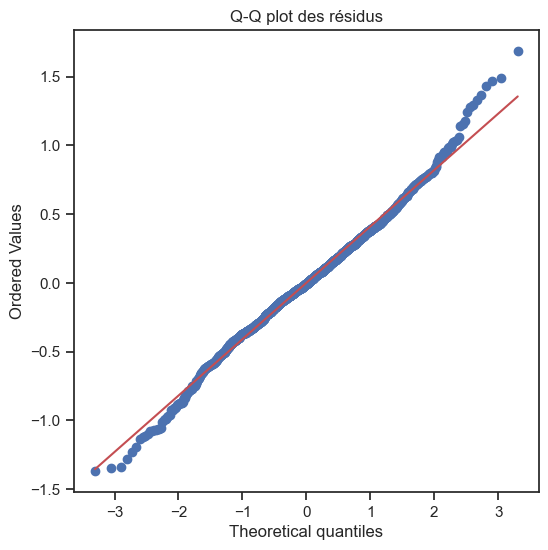

In [36]:
# Q-Q plot des résidus
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q plot des résidus")
plt.show()

### Interprétation du Q–Q plot des résidus

Les points du Q–Q plot sont globalement **alignés avec la droite théorique**, ce qui indique une **distribution globalement proche de la normale**.

De légers écarts apparaissent toutefois aux extrémités de la distribution, ce qui confirme les résultats du test de Shapiro signalant une **non-normalité stricte des résidus**.

Compte tenu de la taille de l’échantillon et de l’objectif du modèle (imputation), ces écarts restent **acceptables pour une utilisation opérationnelle du modèle**.

### 3.7 Conclusion sur la régression linéaire multiple (OLS)

Les diagnostics réalisés montrent que les résidus sont **globalement centrés** et qu’aucune observation ne présente une influence anormale sur le modèle (résidus studentisés, leviers, distance de Cook).

Une **forte colinéarité** est observée entre les variables explicatives, ce qui est cohérent avec la nature géométrique des données. Le test de Breusch–Pagan met en évidence une **hétéroscédasticité**, et le test de Shapiro rejette la normalité stricte des résidus, bien que le Q–Q plot indique une **normalité approchée**.

Malgré ces limites statistiques, le modèle demeure **suffisamment robuste dans un objectif de prédiction**. Il est donc retenu pour procéder à **l’imputation des valeurs manquantes de la variable *margin_low***.

## 4. Imputation des valeurs manquantes

La variable *margin_low* contient 37 valeurs manquantes.  
Une imputation est réalisée à l’aide du modèle de régression linéaire multiple validé précédemment, afin de reconstituer un jeu de données complet pour les analyses de classification.

In [40]:
# ================================
# Section 4.1 - Séparation des données
# ================================

# Données complètes
billet_sans_nan = df[df["margin_low"].notna()].copy()

# Données à imputer
billet_nan = df[df["margin_low"].isna()].copy()

billet_sans_nan.shape, billet_nan.shape

((1463, 7), (37, 7))

In [41]:
# ================================
# Section 4.2 - Modèle final pour l’imputation
# ================================

X_train = billet_sans_nan[["is_genuine", "margin_up"]].copy()
X_train["is_genuine"] = X_train["is_genuine"].astype(int)
X_train = sm.add_constant(X_train)

y_train = billet_sans_nan["margin_low"]

model_imputation_final = sm.OLS(y_train, X_train).fit()
model_imputation_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Wed, 31 Dec 2025   Prob (F-statistic):          1.24e-304
Time:                        11:39:53   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9263      0.198     30.003      0.000       5.539       6.314
is_genuine    -1.1632      0.029    -40.477      0.000      -1.220      -1.107
margin_up     -0.2119      0.059     -3.612      0.000      -0.327      -0.097
==============================================================================
Omnibus:                       22.365   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.106
Skew:                           0.057   Prob(JB):                     3.22e-09
Kurtosis:                       3.793   Cond. No.                         65.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interprétation du modèle de régression réduit

Après sélection des variables significatives (p-value < 0,05), seules **is_genuine** et **margin_up** sont conservées dans le modèle.

Le modèle explique environ **61,7 % de la variance** de *margin_low* (R² = 0,617), ce qui est satisfaisant dans un contexte de données réelles.

Les deux variables sont **hautement significatives** :
- **is_genuine** a un effet négatif fort : un billet authentique présente en moyenne une valeur de *margin_low* plus faible.
- **margin_up** a également un effet négatif significatif.

Le modèle est donc **pertinent pour la prédiction de margin_low**, notamment dans un objectif d’imputation.

In [43]:
# ================================
# Section 4.3 - Prédiction des valeurs manquantes
# ================================

billet_nan = df[df["margin_low"].isna()].copy()

X_nan = billet_nan[["is_genuine", "margin_up"]].copy()
X_nan["is_genuine"] = X_nan["is_genuine"].astype(int)
X_nan = sm.add_constant(X_nan)

billet_nan["margin_low"] = model_imputation_final.predict(X_nan)

In [44]:
# ================================
# Section 4.4 - Reconstruction du jeu de données complet
# ================================

df_imputed = pd.concat([billet_sans_nan, billet_nan]).sort_index()
df_imputed.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

### Interprétation de l’imputation

Les 37 valeurs manquantes de la variable *margin_low* ont été imputées à l’aide du modèle de régression linéaire multiple validé précédemment.

Le jeu de données est désormais **complet**, sans valeur manquante, et peut être utilisé pour les prochaines étapes de modélisation (classification).

### 4.5 Vérification post-imputation

Une vérification rapide est effectuée afin de s’assurer que l’imputation de *margin_low* n’a pas modifié de manière anormale la distribution de la variable.

In [47]:
# ================================
# Section 4.5 - Vérification post-imputation
# ================================

# Comparaison des statistiques descriptives
billet_sans_nan["margin_low"].describe(), df_imputed["margin_low"].describe()

(count    1463.000000
 mean        4.485967
 std         0.663813
 min         2.980000
 25%         4.015000
 50%         4.310000
 75%         4.870000
 max         6.900000
 Name: margin_low, dtype: float64,
 count    1500.000000
 mean        4.482863
 std         0.659849
 min         2.980000
 25%         4.027500
 50%         4.310000
 75%         4.870000
 max         6.900000
 Name: margin_low, dtype: float64)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


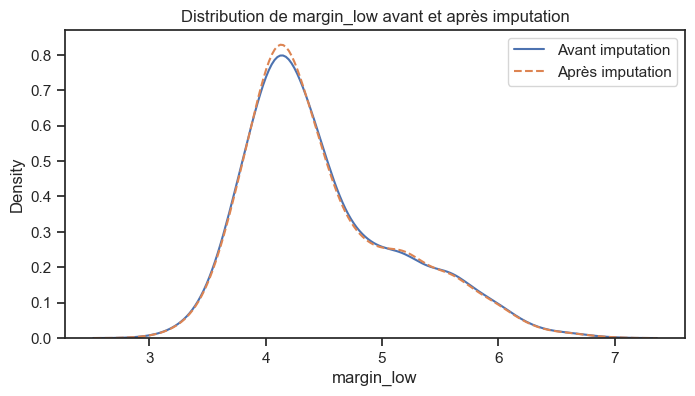

In [48]:
# Visualisation des distributions avant / après imputation
plt.figure(figsize=(8, 4))
sns.kdeplot(billet_sans_nan["margin_low"], label="Avant imputation")
sns.kdeplot(df_imputed["margin_low"], label="Après imputation", linestyle="--")
plt.title("Distribution de margin_low avant et après imputation")
plt.legend()
plt.show()

### Vérification visuelle de la distribution après imputation

Les courbes de densité avant et après imputation sont **quasi strictement superposées**.

Cela confirme visuellement que :
- la forme de la distribution est conservée,
- aucune distorsion artificielle n’a été introduite,
- les valeurs imputées s’intègrent de manière cohérente au jeu de données initial.

L’imputation de *margin_low* est donc **validée à la fois statistiquement et visuellement**.

<a id="4-6-eda-post-imputation"></a>
### 4.6 Analyse exploratoire après imputation

Une courte analyse exploratoire est réalisée après l’imputation de *margin_low* afin de vérifier que la structure globale des données et les relations entre variables sont restées similaires à celles observées avant imputation.

In [51]:
# ======================================
# 4.6.1 – Matrice de corrélation post-imputation
# ======================================

# Calcul de la matrice de corrélation sur les variables numériques
corr_imputed = df_imputed.drop(columns=["is_genuine"]).corr()

corr_imputed

,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,1.000000,0.019472,-0.024492,-0.110474,-0.055649,0.097587
height_left,0.019472,1.000000,0.242279,0.308434,0.246522,-0.320863
height_right,-0.024492,0.242279,1.000000,0.390461,0.307005,-0.401751
margin_low,-0.110474,0.308434,0.390461,1.000000,0.429518,-0.668373
margin_up,-0.055649,0.246522,0.307005,0.429518,1.000000,-0.520575
length,0.097587,-0.320863,-0.401751,-0.668373,-0.520575,1.000000


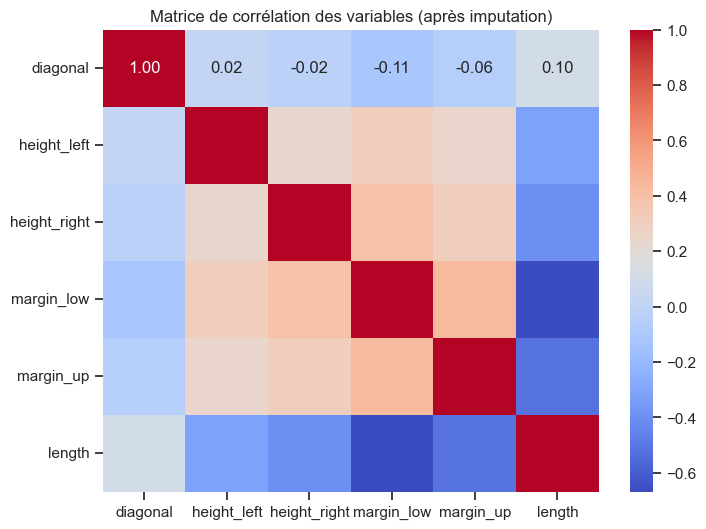

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_imputed, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation des variables (après imputation)")
plt.show()

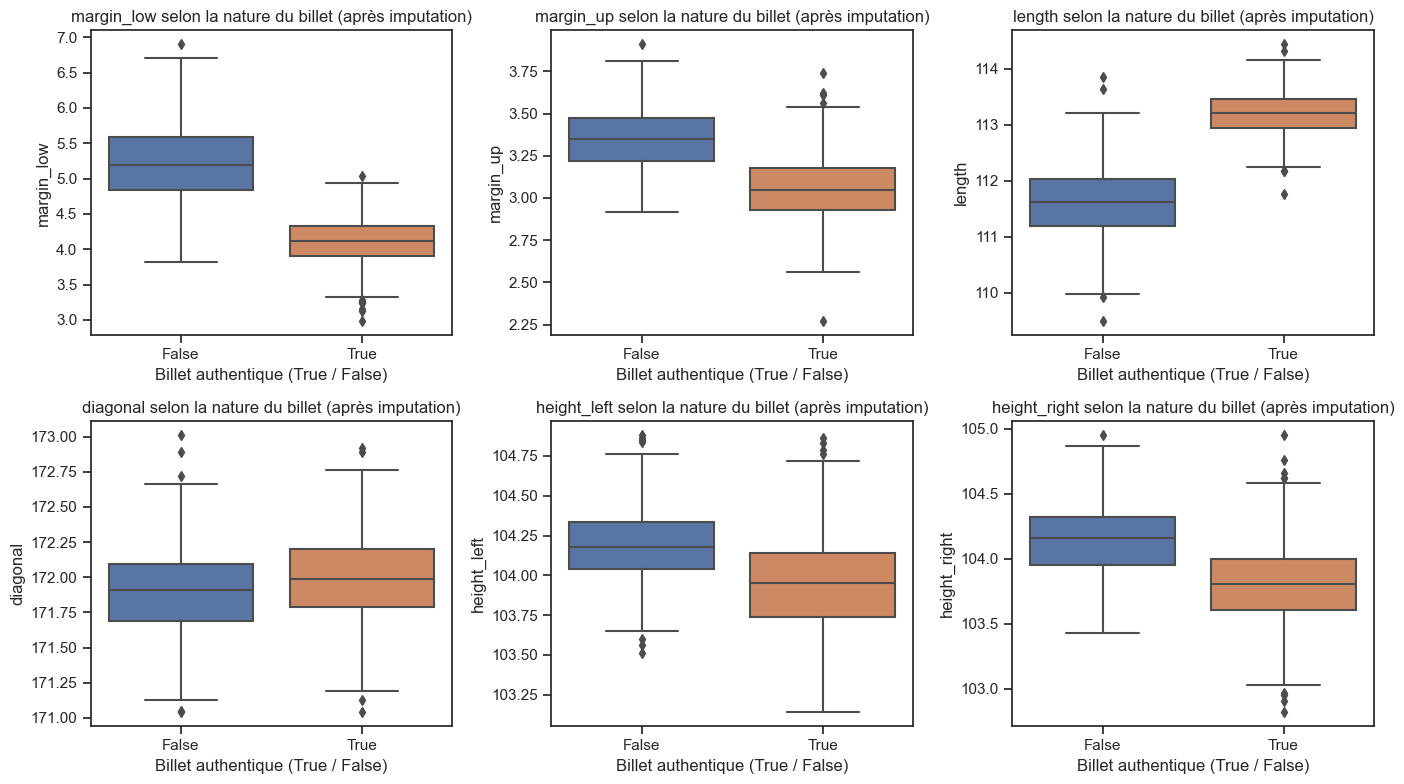

In [53]:
# ======================================
# 4.6.2 – Boxplots des variables après imputation
# ======================================

variables_cles = [
    "margin_low",
    "margin_up",
    "length",
    "diagonal",
    "height_left",
    "height_right"
]

plt.figure(figsize=(14, 8))

for i, var in enumerate(variables_cles, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x="is_genuine", y=var, data=df_imputed)
    plt.title(f"{var} selon la nature du billet (après imputation)")
    plt.xlabel("Billet authentique (True / False)")
    plt.ylabel(var)

plt.tight_layout()
plt.show()

#### Interprétation de l’EDA post-imputation

La matrice de corrélation obtenue après imputation est **très proche** de celle calculée avant imputation : les mêmes couples de variables ressortent comme étant les plus corrélés, en particulier les relations entre *margin_low*, *margin_up* et *length*.

Les boxplots montrent également que les différences entre billets vrais et faux sur les variables clés (*margin_low*, *margin_up*, *length*) sont **préservées** après imputation. Les ordres de grandeur et la séparation entre les groupes restent similaires à ceux observés lors de l’analyse exploratoire initiale.

On en conclut que l’imputation de *margin_low* **n’a pas modifié la structure statistique globale du jeu de données** et que le dataset imputé peut être utilisé en toute confiance pour la phase de modélisation (régression logistique et K-Means).

<a id="5-reg-logistique"></a>
## 5. Régression logistique

La régression logistique est utilisée afin de prédire la variable *is_genuine* (billet authentique ou non) à partir des caractéristiques géométriques des billets.

Il s’agit d’un modèle de classification supervisée permettant d’estimer la probabilité qu’un billet soit authentique.

In [56]:
# ======================================
# 5.1 Préparation des données
# ======================================

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Variables explicatives
X = df_imputed[["diagonal", "height_left", "height_right", "margin_up", "length"]]

# Variable cible
y = df_imputed["is_genuine"].astype(int)

# Séparation train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

### 5.1 Séparation du jeu de données

Le jeu de données est séparé en un ensemble d’entraînement (75 %) et un ensemble de test (25 %).

Cette séparation permet d’évaluer de manière objective les performances du modèle sur des données qu’il n’a jamais vues pendant l’apprentissage.

In [58]:
# ======================================
# 5.2 Entraînement de la régression logistique
# ======================================

model_log = LogisticRegression(max_iter=1000)
model_log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### 5.2 Entraînement du modèle

Le modèle de régression logistique est entraîné sur les données d’apprentissage afin d’estimer les coefficients optimaux reliant les variables explicatives à la probabilité d’authenticité du billet.

### 5.3 Évaluation de la régression logistique

In [61]:
# ======================================
# 5.3 Évaluation du modèle
# ======================================

from sklearn.metrics import confusion_matrix, classification_report

# Prédictions sur le jeu de test
y_pred = model_log.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
cm

array([[117,   8],
       [  2, 248]])

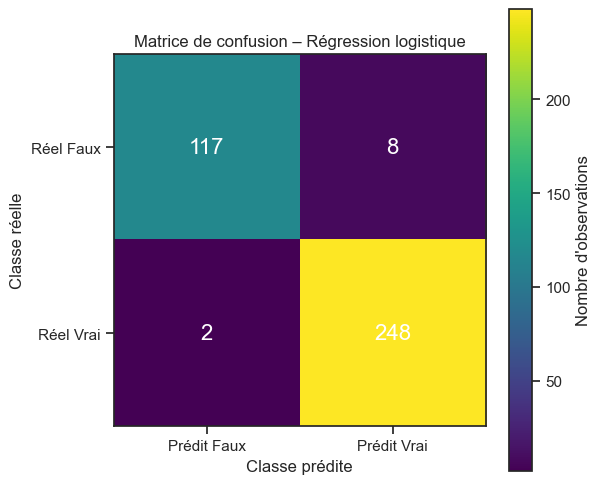

In [62]:
## Visuel de la matrice de confusion 

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, model_log.predict(X_test))

fig, ax = plt.subplots(figsize=(6, 6))

# Affichage de la matrice
im = ax.imshow(cm, cmap="viridis")

# Ajout de l’échelle de couleur
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Nombre d'observations")

# Labels des axes
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["Prédit Faux", "Prédit Vrai"])
ax.set_yticklabels(["Réel Faux", "Réel Vrai"])

# Correction de l’orientation de l’axe Y
ax.set_ylim(1.5, -0.5)

# Annotation des valeurs dans les cellules
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j],
                ha="center", va="center",
                fontsize=16, color="white")

# Titres
ax.set_title("Matrice de confusion – Régression logistique")
ax.set_xlabel("Classe prédite")
ax.set_ylabel("Classe réelle")

plt.show()

In [63]:
# Rapport de classification
print(classification_report(y_test, y_pred))

## accuracy = proportion de prédiction correcte, 

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       125
           1       0.97      0.99      0.98       250

    accuracy                           0.97       375
   macro avg       0.98      0.96      0.97       375
weighted avg       0.97      0.97      0.97       375



AUC : 0.994


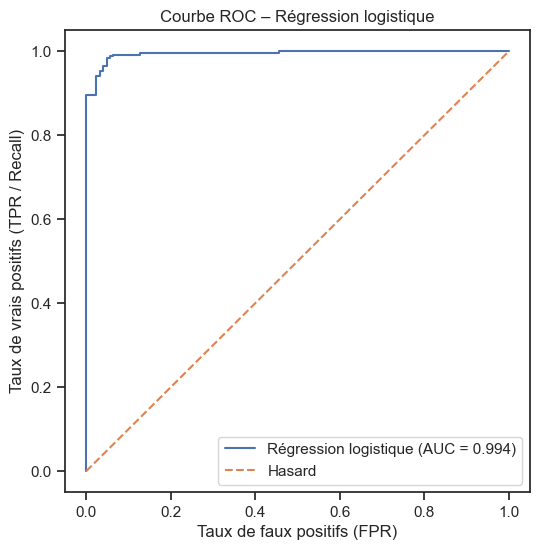

In [64]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilités prédites pour la classe 1 (billet vrai)
y_proba = model_log.predict_proba(X_test)[:, 1]

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# AUC
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC : {auc_score:.3f}")

# Plot
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"Régression logistique (AUC = {auc_score:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Hasard")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR / Recall)")
plt.title("Courbe ROC – Régression logistique")
plt.legend()
plt.show()

### Évaluation du modèle de régression logistique

L’évaluation du modèle repose sur trois éléments complémentaires : la matrice de confusion, le rapport de classification et la courbe ROC.

La matrice de confusion montre un nombre très limité d’erreurs de classification, avec seulement quelques faux positifs et faux négatifs. Le modèle distingue donc efficacement les billets authentiques des billets falsifiés.

Le rapport de classification confirme ces résultats, avec des scores de précision, de rappel et de F1-score très élevés pour les deux classes. L’accuracy globale atteint **97 %**, indiquant une excellente performance globale du modèle.

La courbe ROC présente une aire sous la courbe (**AUC = 0,994**), très proche de 1. Cette valeur traduit une capacité de discrimination quasi parfaite, quel que soit le seuil de décision retenu.

Ces résultats montrent que la régression logistique est **robuste, fiable et parfaitement adaptée** à la détection des faux billets dans ce contexte.

## 6.1 Préparation des données pour le clustering (K-Means)

Le clustering K-Means étant sensible à l’échelle des variables, les données sont standardisées afin de donner un poids équivalent à chaque mesure géométrique.

L’algorithme est appliqué uniquement sur les variables quantitatives, sans utiliser la variable cible `is_genuine`.

In [67]:
from sklearn.preprocessing import StandardScaler

X_kmeans = df_imputed[[
    "diagonal",
    "height_left",
    "height_right",
    "margin_low",
    "margin_up",
    "length"
]]

scaler = StandardScaler()
X_kmeans_scaled = scaler.fit_transform(X_kmeans)

## 6.2 Détermination du nombre de clusters (méthode du coude)

La méthode du coude est utilisée afin d’identifier le nombre optimal de clusters en analysant l’inertie intra-cluster en fonction de k.

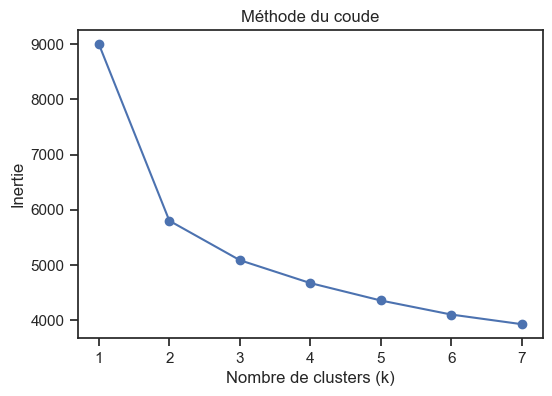

In [69]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 8):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_kmeans_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 8), inertia, marker="o")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")
plt.title("Méthode du coude")
plt.show()

## 6.3 Entraînement du modèle K-Means

Le modèle K-Means est entraîné avec k = 2 clusters afin d’identifier d’éventuels groupes naturels au sein des billets. Le choix de 2 clusters est justifié par la méthode du coude

In [71]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_kmeans_scaled)

df_imputed["cluster"] = clusters
df_imputed["cluster"].value_counts()

cluster
1    1003
0     497
Name: count, dtype: int64

## 6.4 Comparaison des clusters avec la variable `is_genuine`

Les clusters obtenus sont comparés à la variable réelle `is_genuine` afin d’évaluer la capacité du clustering à séparer les billets authentiques et falsifiés.

In [73]:
pd.crosstab(df_imputed["cluster"], df_imputed["is_genuine"])

is_genuine,False,True
cluster,,
0,487,10
1,13,990


In [74]:
from sklearn.metrics import confusion_matrix, classification_report

# Ajustement éventuel des labels
# (on inverse si nécessaire pour avoir cluster ≈ is_genuine)
cm = confusion_matrix(df_imputed["is_genuine"], df_imputed["cluster"])
cm

array([[487,  13],
       [ 10, 990]])

### Visualisation de la matrice de confusion – K-Means

Une représentation graphique de la matrice de confusion permet de visualiser plus facilement la répartition des billets entre les clusters et leur correspondance avec la variable réelle `is_genuine`.

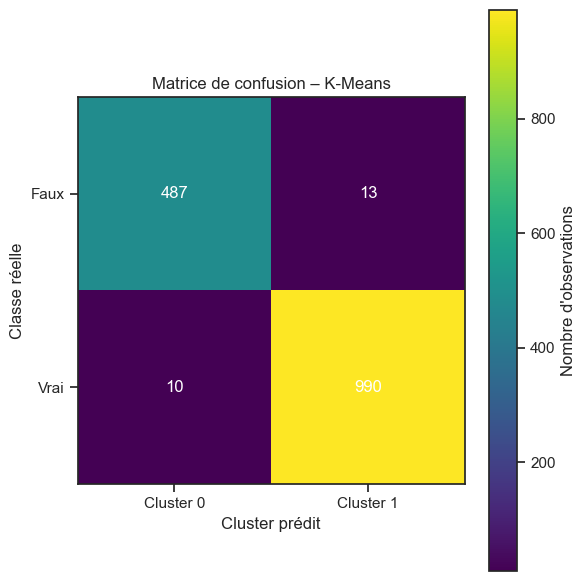

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Matrice de confusion
cm = confusion_matrix(df_imputed["is_genuine"], df_imputed["cluster"])

fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(cm, cmap="viridis")

# Barre de couleur
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Nombre d'observations")

# Axes et labels
ax.set_title("Matrice de confusion – K-Means")
ax.set_xlabel("Cluster prédit")
ax.set_ylabel("Classe réelle")

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["Cluster 0", "Cluster 1"])
ax.set_yticklabels(["Faux", "Vrai"])

# Annotations des valeurs
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j],
                ha="center", va="center",
                color="white",
                fontsize=12)

plt.tight_layout()
plt.show()

La matrice de confusion montre que le clustering K-Means parvient à séparer efficacement la majorité des billets authentiques et falsifiés.

La majorité des billets falsifiés est regroupée dans un même cluster, tout comme les billets authentiques, avec un nombre limité de confusions.

Ces résultats confirment que les caractéristiques géométriques des billets contiennent une information discriminante forte, même sans supervision.

## 7.1 Test des Modèles KNN et Random Forest

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entraînement
knn.fit(X_train, y_train)

# Prédictions
y_pred_knn = knn.predict(X_test)

# Évaluation
print("Matrice de confusion – KNN")
print(confusion_matrix(y_test, y_pred_knn))

print("\nRapport de classification – KNN")
print(classification_report(y_test, y_pred_knn))

Matrice de confusion – KNN
[[116   9]
 [  4 246]]

Rapport de classification – KNN
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       125
           1       0.96      0.98      0.97       250

    accuracy                           0.97       375
   macro avg       0.97      0.96      0.96       375
weighted avg       0.97      0.97      0.97       375



### 🔎 Analyse du modèle KNN

Le modèle **K-Nearest Neighbors (KNN)** a été testé afin de comparer ses performances à celles de la régression logistique.

Les résultats montrent :
- une **accuracy élevée (~97 %)**, comparable à celle du modèle logistique ;
- une bonne capacité de discrimination entre billets authentiques et falsifiés ;
- toutefois, un **nombre légèrement plus élevé d’erreurs** (faux positifs et faux négatifs).

Par ailleurs, le modèle KNN :
- est **sensible au choix des hyperparamètres** (nombre de voisins) ;
- est **moins interprétable** qu’un modèle linéaire ;
- fournit des résultats moins directement exploitables en production.

**Conclusion :**  
Le KNN confirme la bonne séparabilité des données, mais la **régression logistique reste privilégiée** pour la suite du projet, en raison de sa **robustesse**, de son **interprétabilité** et de son **meilleur compromis performance / lisibilité**.

## 7.2 Modèle Random Forest

Le modèle **Random Forest** est testé afin de comparer ses performances aux modèles précédents  
(régression logistique et KNN).

Il s’agit d’un algorithme supervisé basé sur un ensemble d’arbres de décision, dont les prédictions sont agrégées afin d’améliorer la robustesse et la performance globale du modèle.

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Modèle Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

# Entraînement
rf.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf.predict(X_test)

# Évaluation
print("Matrice de confusion – Random Forest")
print(confusion_matrix(y_test, y_pred_rf))

print("\nRapport de classification – Random Forest")
print(classification_report(y_test, y_pred_rf))

Matrice de confusion – Random Forest
[[117   8]
 [  1 249]]

Rapport de classification – Random Forest
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       125
           1       0.97      1.00      0.98       250

    accuracy                           0.98       375
   macro avg       0.98      0.97      0.97       375
weighted avg       0.98      0.98      0.98       375



### 🔎 Analyse du modèle Random Forest

Le modèle **Random Forest** affiche des performances légèrement supérieures aux modèles précédents, avec une accuracy de **98 %** et un très faible nombre d’erreurs de classification.

La matrice de confusion montre :
- très peu de faux positifs (billets falsifiés prédits authentiques),
- une excellente détection des billets authentiques (rappel = 1.00 pour la classe 1).

Cependant, malgré ces très bons résultats :
- le gain de performance par rapport à la régression logistique reste **marginal** ;
- le modèle est **moins interprétable** contrairement à la régression logistique qui présente un taux de probabilité d'authenticité;
- sa complexité est plus élevée pour un usage opérationnel, il est bien plus gourmand en mémoire et puissance de calcul.

**Conclusion :**  
Le Random Forest confirme la forte séparabilité des données, mais la **régression logistique est conservée comme modèle final**, car elle offre un excellent compromis entre **performance, simplicité et explicabilité**.

## Conclusion globale – Partie Machine Learning

Les différentes approches de *Machine Learning* mises en œuvre dans ce projet permettent de répondre de manière complémentaire à la problématique de détection des faux billets.

Dans un premier temps, une **régression linéaire multiple** a été utilisée afin de modéliser la variable *margin_low* et d’imputer les valeurs manquantes. Les diagnostics statistiques (résidus studentisés, distance de Cook, colinéarité, tests d’homoscédasticité et de normalité) montrent que, malgré certaines limites statistiques attendues sur des données géométriques corrélées, le modèle est **suffisamment robuste pour un objectif de prédiction**. L’imputation réalisée n’altère pas la distribution de la variable, comme le confirment les analyses post-imputation.

Dans un second temps, une **régression logistique** a été mise en place pour prédire l’authenticité des billets. Les performances obtenues sont très élevées, avec une matrice de confusion quasi parfaite, un excellent rapport précision / rappel et une **AUC proche de 1**, indiquant une capacité de discrimination remarquable entre billets authentiques et falsifiés.

Enfin, une approche non supervisée par **K-means** a permis d’explorer la structure intrinsèque des données. Les clusters obtenus correspondent très largement à la variable réelle *is_genuine*, ce qui confirme que les caractéristiques géométriques des billets contiennent une information suffisante pour séparer naturellement les deux classes, même sans connaissance préalable des labels.

En conclusion, l’ensemble des méthodes mises en œuvre — supervisées et non supervisées — convergent vers le même résultat :  
les données géométriques permettent une **détection fiable et robuste des faux billets**, et le modèle final de régression logistique constitue une solution opérationnelle pertinente pour une mise en production.